In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":12,
    "n_white_vehicle":2,
    "n_white_drone":1},
    "init":"SE"
  },

  "blacks":{
    "params":{
    "n_black_infantry":12,
    "n_black_vehicle":2,
    "n_black_drone":1},
    "init":"NW"
  }
}

In [3]:
sim = Environment(config, shape=(100,100), time_limit=96)

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

PHOENIX       <plato.entity.infantry.Infantry object at 0x116c7a0d0>
GUNSTONHALL   <plato.entity.infantry.Infantry object at 0x11d621e50>
BISBEE        <plato.entity.infantry.Infantry object at 0x11d62f910>
WHISKEY       <plato.entity.infantry.Infantry object at 0x11d632410>
BUNKERHILL    <plato.entity.infantry.Infantry object at 0x11d632ed0>
IPSWICH       <plato.entity.infantry.Infantry object at 0x11d6359d0>
GONZALEZ      <plato.entity.infantry.Infantry object at 0x11d6384d0>
ZERO          <plato.entity.infantry.Infantry object at 0x11d638f90>
THESULLIVANS  <plato.entity.infantry.Infantry object at 0x11d639a90>
STOCKDALE     <plato.entity.infantry.Infantry object at 0x11d63a590>
STILLWATER    <plato.entity.infantry.Infantry object at 0x11d63db90>
TEMPEST       <plato.entity.infantry.Infantry object at 0x11d63dbd0>
LAGUNA        <plato.entity.vehicle.Vehicle object at 0x11d63db50>
SPALDING      <plato.entity.vehicle.Vehicle object at 0x10f3bd8d0>
GIFFORDS      <plato.entity.drone.Dron

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x11d641390>
unknown_1     <plato.entity.infantry.Infantry object at 0x11d6413d0>
unknown_2     <plato.entity.infantry.Infantry object at 0x11d641e90>
unknown_3     <plato.entity.infantry.Infantry object at 0x11d646990>
unknown_4     <plato.entity.infantry.Infantry object at 0x11d647490>
unknown_5     <plato.entity.infantry.Infantry object at 0x11d647f50>
unknown_6     <plato.entity.infantry.Infantry object at 0x11d649a50>
unknown_7     <plato.entity.infantry.Infantry object at 0x11d64a550>
unknown_8     <plato.entity.infantry.Infantry object at 0x11d64d050>
unknown_9     <plato.entity.infantry.Infantry object at 0x11d64db10>
unknown_10    <plato.entity.infantry.Infantry object at 0x11d650150>
unknown_11    <plato.entity.infantry.Infantry object at 0x11d650190>
unknown_12    <plato.entity.vehicle.Vehicle object at 0x11d64e610>
unknown_13    <plato.entity.vehicle.Vehicle object at 0x11d650110>
unknown_14    <plato.entity.drone.Dron

In [7]:
import random
target = random.choice(list(sim.blacks.values()))
print('{:13}'.format(target.id), target)

unknown_5     <plato.entity.infantry.Infantry object at 0x11d647f50>


In [8]:
from plato.objective.spatiotemporal.engage_objective import EngageObjective
objectives = [EngageObjective(interval=[10,70], target=target, radius=10)]
sim.objectives = objectives

In [9]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 100, 100)

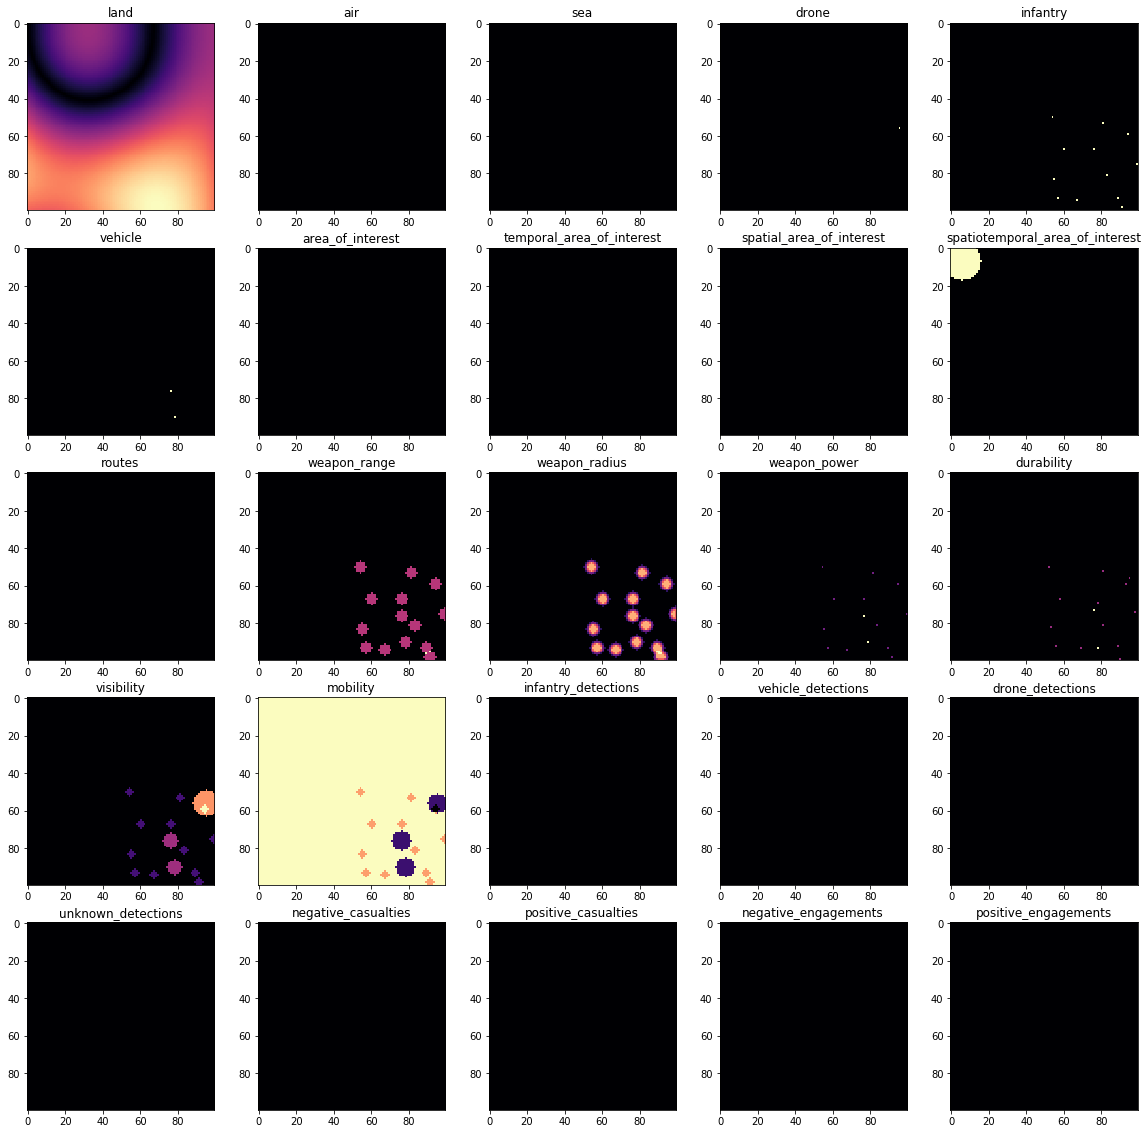

In [10]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

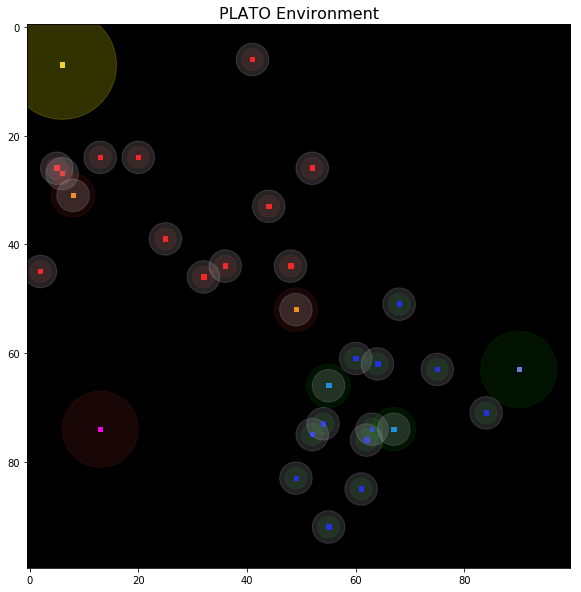

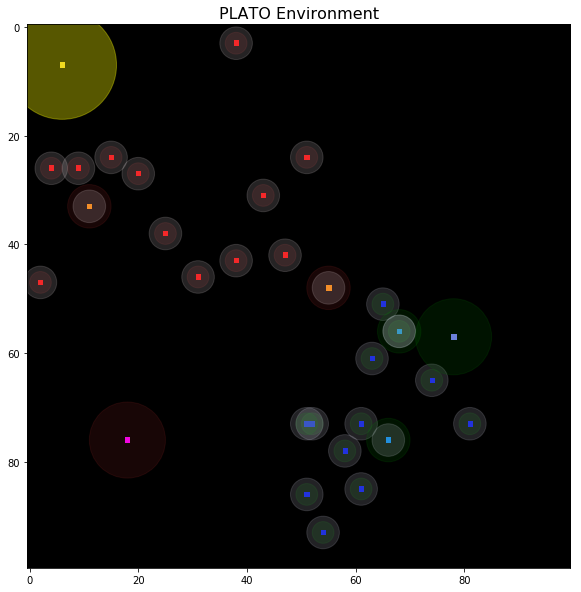

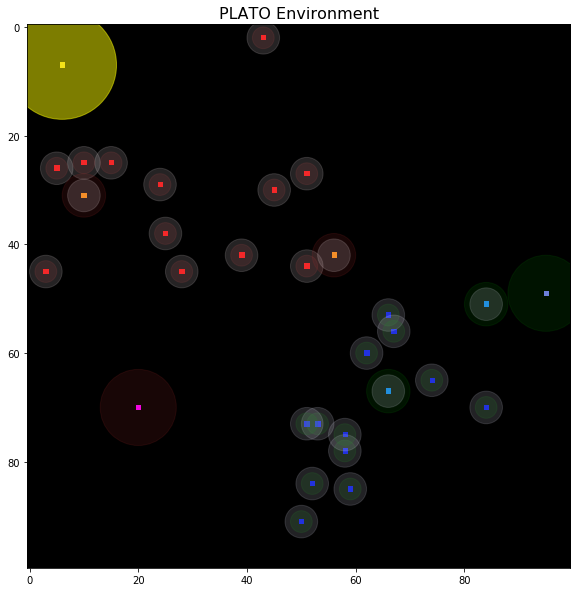

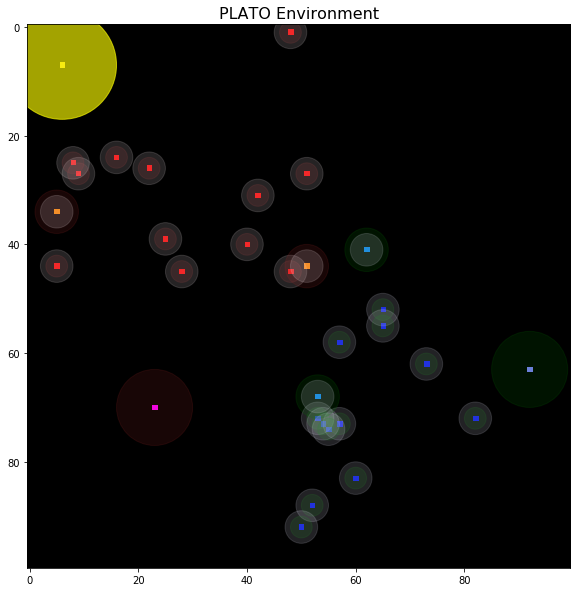

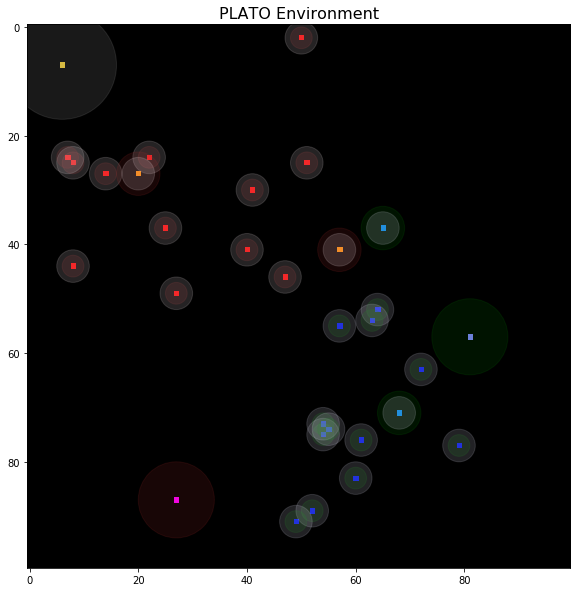

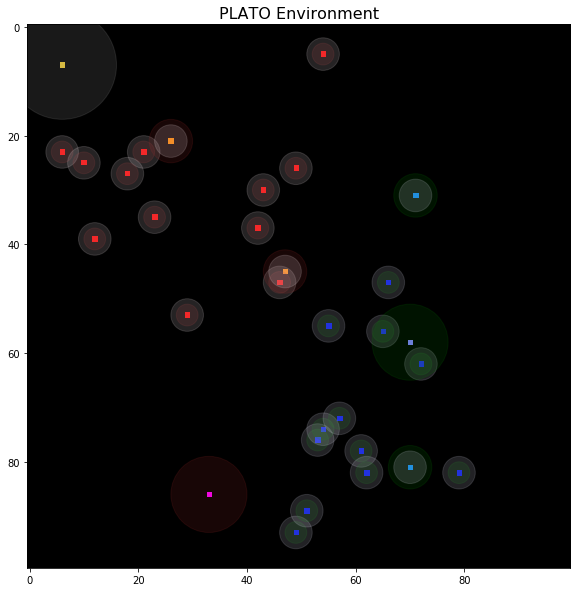

Black Kills:
White Kills:

Reward: 0


In [11]:
import tqdm
sim.reset()
bar = tqdm.tqdm_notebook(total=sim.time_limit)

terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metadata = sim.step(whites, blacks)
    state = sprime
    bar.update(1)
    
    if sim.timer % 16 == 0: sim.render()
           
print('Black Kills:')
for ent in metadata['positive_casualties']: print('\t',ent.id,ent)
print('White Kills:')
for ent in metadata['negative_casualties']: print('\t',ent.id,ent)

print('\nReward:', reward)